In [1]:
%pylab inline
from scipy.integrate import odeint
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Backward Euler method applied to the Schlogl model
#
# Takes in parameters:
#     steps: The number of steps
#     tfinal: final time
#     ua, ub ,uc: intial concentrations of a, b and x
#     k1, k2, k3, k4: Denote the reaction rates for reaction 1,2,3,4 respectively
#
def BE(steps, tfinal, ua, ub, ux, k1, k2, k3 ,k4):
    # Time
    t = linspace(0,tfinal, steps)
    dt = t[1] - t[0]

    U = zeros((3,steps))
    U[:,0] = array([ua, ub, ux]) # Initial conditions
    error = zeros((3,steps))
    
    # System of non-linear equations
    def eqn(u,t):
        ua = - k1*u[0]*(u[2]**2) + k2*(u[2])**3
        ub = -k3*u[1] + k4*u[2]
        ux = k1*(u[2]**2)*u[0] - k2*u[2]**3 + k3*u[1] -k4*u[2]
        eqn = array([ua,ub,ux])
        return eqn

    # Corresponding Jacobian matrix
    def Jacob(u):
        dna = array([-k1*(u[2]**2), 0, -2*k1*u[2]*u[0]+3*k2*(u[2]**2)])
        dnb = array([0, -k3, k4])
        dnx = array([k1*(u[2]**2), k3, 2*k1*u[2]*u[0]-3*k2*(u[2]**2)-k4])
        return vstack((dna,dnb,dnx))
    
    g = lambda u,t,Un: u - Un - dt*eqn(u,t)
    gprime = lambda u,t: eye(3) - dt*Jacob(u)
    
    for n in range(steps - 1):
        
        Uhat = U[:,n] # initial guess for Newton iteration
        for j in range(10):
            # Newton iteration
            rhs = -g(Uhat, t[n+1], U[:,n])
            delta = solve(gprime(Uhat,t[n+1]), rhs)
            Uhat = Uhat + delta
            if norm(delta,inf) < 1e-8:  # convergence test
                break
            
        U[:,n+1] = U[:,n] + dt * eqn(Uhat, t[n+1])  # backward Euler update

    # Plotting
    figure(figsize=(15,9))
    f = plot(t,U[0],'b-',label = "$u_{a}$")
    plot(t,U[1],'g--', label = "$u_{b}$")
    plot(t,U[2],'r-.', label = "$u_{x}$")
    xlabel("Time", fontsize = 15)
    rcParams.update({'font.size': 20})
    ylabel("Concentration", fontsize = 20)
    title('LMA: Backward Euler simulation with $\eta = [1,1,1]$', fontsize = 25)
    legend(loc=9, bbox_to_anchor=(0.5, -0.07), ncol=3, prop = {'size':20})
    show()
    
    return U,t, error

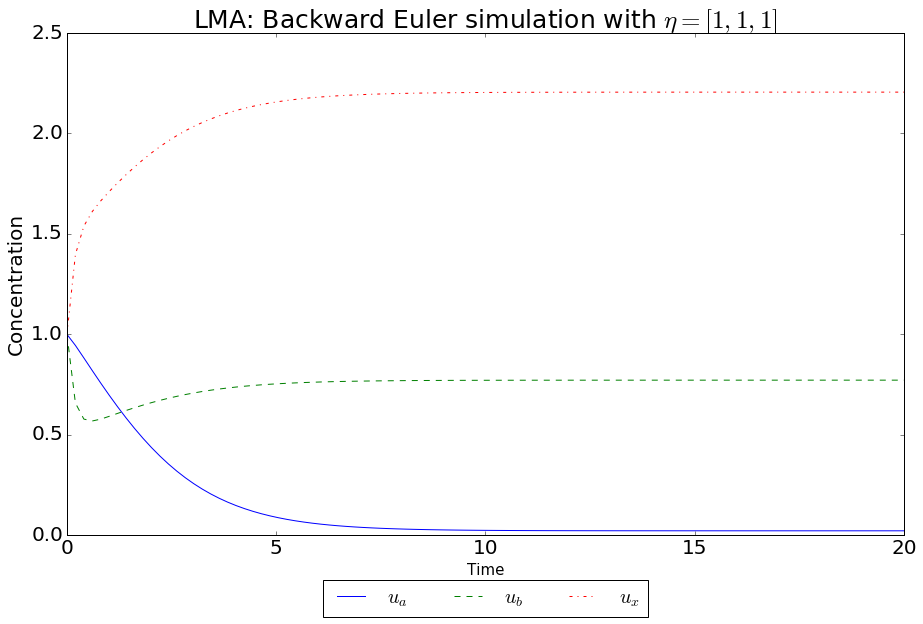

In [3]:
u,t,e = BE(100, 20, 1, 1, 1, 0.15, 0.0015, 10 ,3.5)